In [1]:
# Import libraries
import pandas as pd
import numpy as np
from math import sqrt
import time
from collections import Counter
import itertools
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
sns.set_theme(palette='magma_r')
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_rows', 100) # Allows Jupyter Notebook to expand how much data is shown

In [2]:
# Load DataFrame
df = pd.read_csv('./data/kc_house_data.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4580474287.770987,540296.573506,3.373200,2.115826,2080.321850,15099.408760,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2876735715.747780,367368.140101,0.926299,0.768984,918.106125,41412.636876,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1000102.000000,78000.000000,1.000000,0.500000,370.000000,520.000000,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2123049175.000000,322000.000000,3.000000,1.750000,1430.000000,5040.000000,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3904930410.000000,450000.000000,3.000000,2.250000,1910.000000,7618.000000,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7308900490.000000,645000.000000,4.000000,2.500000,2550.000000,10685.000000,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9900000190.000000,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
price_corr = df.corr()['price'].map(abs).sort_values(ascending=False)
price_corr

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

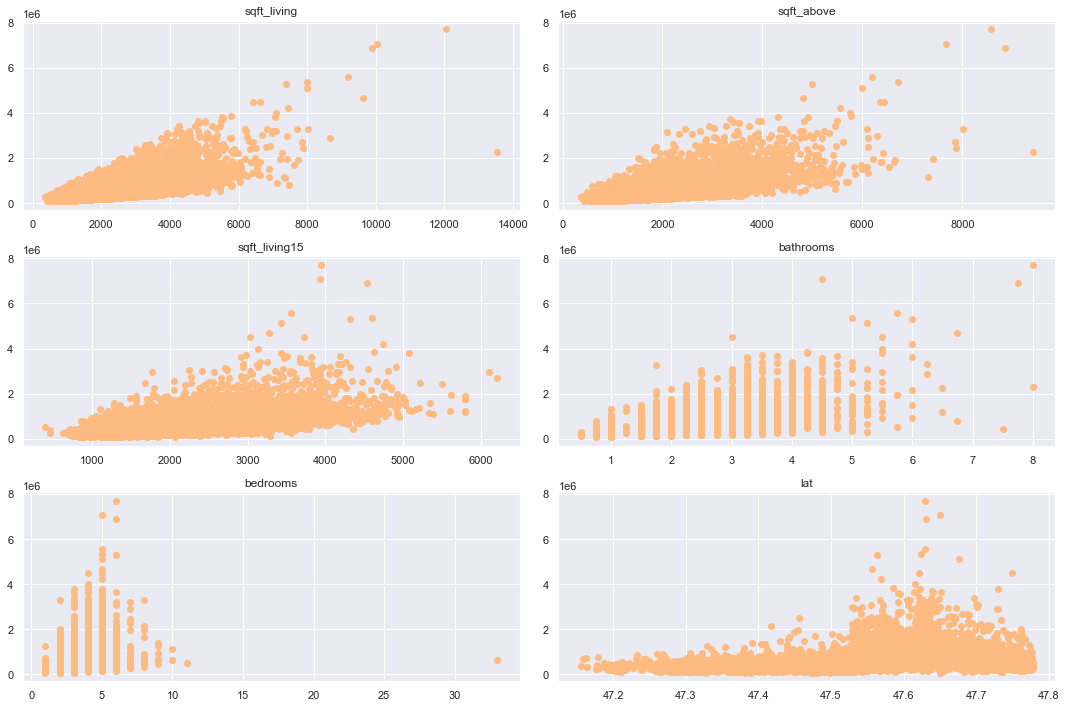

In [7]:
# Plot top 6 feature correlations with price
fig, axs = plt.subplots(3, 2, figsize=(15,10))
axs[0, 0].scatter(df.sqft_living, df.price)
axs[0, 0].set_title('sqft_living')
axs[0, 1].scatter(df.sqft_above, df.price)
axs[0, 1].set_title('sqft_above')
axs[1, 0].scatter(df.sqft_living15, df.price)
axs[1, 0].set_title('sqft_living15')
axs[1, 1].scatter(df.bathrooms, df.price)
axs[1, 1].set_title('bathrooms')
axs[2, 0].scatter(df.bedrooms, df.price)
axs[2, 0].set_title('bedrooms')
axs[2, 1].scatter(df.lat, df.price)
axs[2, 1].set_title('lat')
fig.tight_layout();

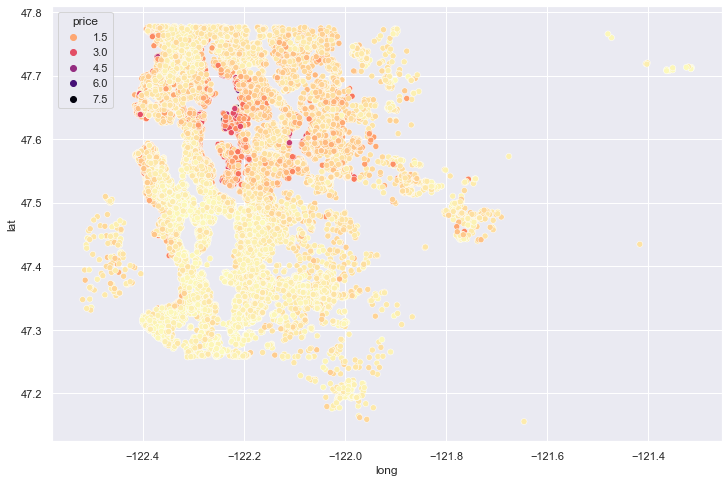

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='long', y='lat', hue='price', palette='magma_r');

# Data Cleaning, Preparation, Feature Engineering, etc.

In [9]:
# Create a function to identify duplicates
def determine_dupes(series):
    series_vcs = pd.Series(series.value_counts())
    series_dupes = [series_vcs.index[index] for index in range(len(series_vcs)) if series_vcs.values[index] > 1]
    print("Amount of unique duplicates: " + str(len(series_dupes)))
    print("Total amount of duplicates: " + str(series_vcs.values[0:len(series_dupes)].sum()))
    
    return series_vcs

In [10]:
# Run duplicates function for 'id' series
determine_dupes(df.id)

Amount of unique duplicates: 176
Total amount of duplicates: 353


795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [11]:
# Drop duplicates found within 'id' series
df = df.drop_duplicates(subset=['id'], keep='last')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     19067 non-null  object 
 9   view           21357 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   17607 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

In [12]:
# Examine number of bedrooms for outliers
df.bedrooms.value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [13]:
# 33 bedrooms for a 1620 sqft house is a mistake. We'll drop those values.
# 9, 10 & 11 bedrooms for houses under 5000 sqft are also a mistake. We'll drop.
df.drop(df.loc[df['bedrooms']==33].index, inplace=True)
df.drop(df.loc[df['bedrooms']==11].index, inplace=True)
df.drop(df.loc[df['bedrooms']==10].index, inplace=True)
df.drop(df.loc[df['bedrooms']==9].index, inplace=True)

df.sort_values('bedrooms', ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10946,1652500060,7/11/2014,1650000.0,8,2.75,4040,20666,1.0,NO,NONE,...,9 Better,2020,2020.0,1962,0.0,98004,47.6340,-122.221,3670,20500
12872,8813400155,12/19/2014,808000.0,8,3.75,3460,4600,2.0,NO,NONE,...,7 Average,2860,600.0,1987,0.0,98105,47.6617,-122.289,2170,3750
17221,1338600225,5/28/2014,1970000.0,8,3.50,4440,6480,2.0,NO,GOOD,...,10 Very Good,3140,1300.0,1959,0.0,98112,47.6310,-122.303,4440,8640
15656,8141200080,8/14/2014,680000.0,8,2.75,2530,4800,2.0,NO,NONE,...,7 Average,1390,1140.0,1901,NaN,98112,47.6241,-122.305,1540,4800
1658,9126101740,12/4/2014,490000.0,8,5.00,2800,2580,2.0,NO,NONE,...,8 Good,1880,920.0,1997,0.0,98122,47.6086,-122.303,1800,2580
9068,6746700615,3/18/2015,700000.0,8,2.50,2280,3000,1.5,NO,NONE,...,7 Average,1210,1070.0,1911,0.0,98105,47.6675,-122.316,1610,3000
4031,685000115,10/7/2014,2150000.0,8,6.00,4340,9415,2.0,NO,NONE,...,8 Good,4340,0.0,1967,0.0,98004,47.6316,-122.202,2050,9100
4063,7226500100,2/19/2015,373000.0,8,3.00,2850,12714,1.0,NaN,NONE,...,7 Average,2850,0.0,1959,0.0,98055,47.4859,-122.205,1480,4942
6168,1873400020,7/3/2014,340000.0,8,2.75,2790,6695,1.0,NaN,NONE,...,7 Average,1470,1320.0,1977,NaN,98133,47.7565,-122.331,1760,7624
19287,3756900027,11/25/2014,575000.0,8,3.00,3840,15990,1.0,NO,NONE,...,7 Average,2530,1310.0,1961,0.0,98034,47.7111,-122.211,1380,8172


In [14]:
# Replace NaN/?/missing values with 0, None or No for respective series
# Also change object series to integer via astype function
df.yr_renovated = df.yr_renovated.fillna(0)
df.yr_renovated = df.yr_renovated.astype('int64')

df.view = df.view.fillna('NONE')

df.waterfront = df.waterfront.fillna('NO')

df.loc[df.sqft_basement == '?', 'sqft_basement'] = 0.0
df.sqft_basement = df.sqft_basement.astype('float64').astype('int64')

In [15]:
df.grade = pd.to_numeric(df.grade.map(lambda x: x.split()[0]))
df['grade'].replace('3 Poor', 3, inplace=True)
df['grade'].replace('4 Low', 4, inplace=True)
df['grade'].replace('5 Fair', 5, inplace=True)
df['grade'].replace('6 Low Average', 6, inplace=True)
df['grade'].replace('7 Average', 7, inplace=True)
df['grade'].replace('8 Good', 8, inplace=True)
df['grade'].replace('9 Better', 9, inplace=True)
df['grade'].replace('10 Very Good', 10, inplace=True)
df['grade'].replace('11 Excellent', 11, inplace=True)
df['grade'].replace('12 Luxury', 12, inplace=True)
df['grade'].replace('13 Mansion', 13, inplace=True)
df.grade.value_counts()

7     8881
8     6040
9     2605
6     1995
10    1130
11     395
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [16]:
df['condition'].replace('Poor', 1, inplace=True)
df['condition'].replace('Fair', 2, inplace=True)
df['condition'].replace('Average', 3, inplace=True)
df['condition'].replace('Good', 4, inplace=True)
df['condition'].replace('Very Good', 5, inplace=True)
df.condition.value_counts()

3    13892
4     5641
5     1686
2      162
1       28
Name: condition, dtype: int64

In [17]:
df['waterfront'].replace('NO', 0, inplace=True)
df['waterfront'].replace('YES', 1, inplace=True)
df.waterfront.value_counts()

0    21263
1      146
Name: waterfront, dtype: int64

In [18]:
df['view'].replace('NONE', 0, inplace=True)
df['view'].replace('FAIR', 2, inplace=True)
df['view'].replace('AVERAGE', 3, inplace=True)
df['view'].replace('GOOD', 4, inplace=True)
df['view'].replace('EXCELLENT', 5, inplace=True)
df.view.value_counts()

0    19306
3      955
4      505
2      329
5      314
Name: view, dtype: int64

In [19]:
# Change 'date' series to datetime data type (may not be needed)
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21409 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21409 non-null  int64         
 1   date           21409 non-null  datetime64[ns]
 2   price          21409 non-null  float64       
 3   bedrooms       21409 non-null  int64         
 4   bathrooms      21409 non-null  float64       
 5   sqft_living    21409 non-null  int64         
 6   sqft_lot       21409 non-null  int64         
 7   floors         21409 non-null  float64       
 8   waterfront     21409 non-null  int64         
 9   view           21409 non-null  int64         
 10  condition      21409 non-null  int64         
 11  grade          21409 non-null  int64         
 12  sqft_above     21409 non-null  int64         
 13  sqft_basement  21409 non-null  int64         
 14  yr_built       21409 non-null  int64         
 15  yr_renovated   2140

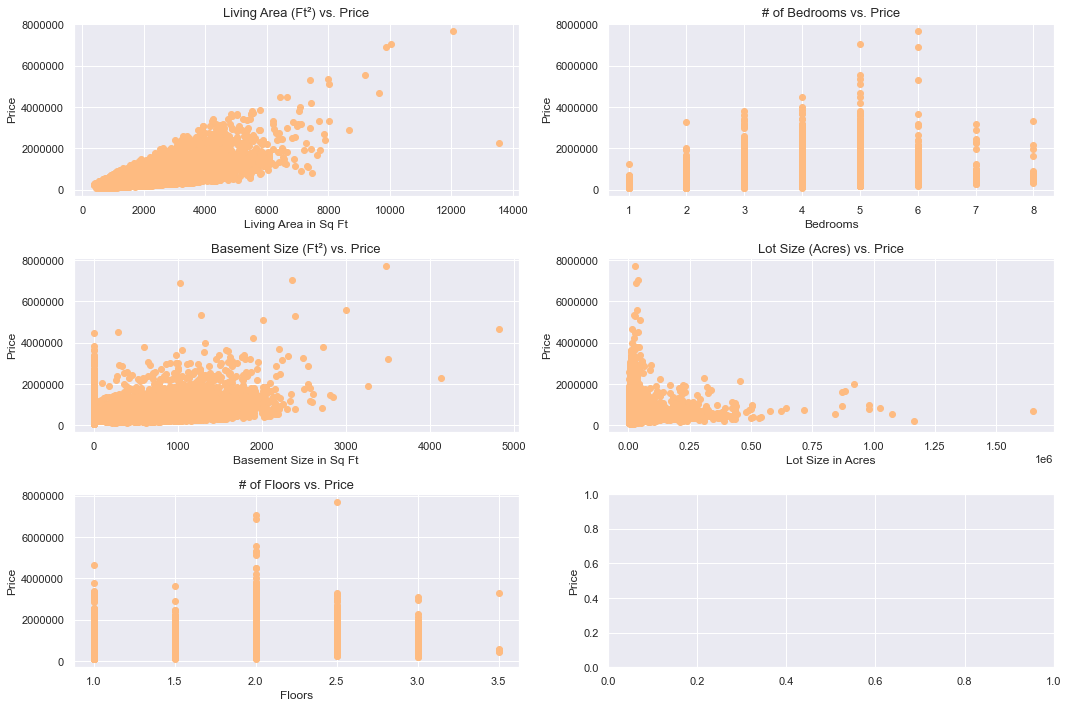

In [20]:
fig, axs = plt.subplots(3, 2, figsize=(15,10))
axs[0, 0].scatter(df.sqft_living, df.price)
axs[0, 0].set_title('Living Area (Ft²) vs. Price', fontsize=13)
axs[0, 0].set_xlabel('Living Area in Sq Ft')
axs[0, 0].ticklabel_format(style='plain', axis='y')

axs[0, 1].scatter(df.bedrooms, df.price)
axs[0, 1].set_title('# of Bedrooms vs. Price', fontsize=13)
axs[0, 1].set_xlabel('Bedrooms')
axs[0, 1].ticklabel_format(style='plain', axis='y')

axs[1, 0].scatter(df.sqft_basement, df.price)
axs[1, 0].set_title('Basement Size (Ft²) vs. Price', fontsize=13)
axs[1, 0].set_xlabel('Basement Size in Sq Ft')
axs[1, 0].ticklabel_format(style='plain', axis='y')

axs[1, 1].scatter(df.sqft_lot, df.price)
axs[1, 1].set_title('Lot Size (Acres) vs. Price', fontsize=13)
axs[1, 1].set_xlabel('Lot Size in Acres')
axs[1, 1].ticklabel_format(style='plain', axis='y')

axs[2, 0].scatter(df.floors, df.price)
axs[2, 0].set_title('# of Floors vs. Price', fontsize=13)
axs[2, 0].set_xlabel('Floors')
axs[2, 0].ticklabel_format(style='plain', axis='y')

for ax in axs.flat:
    ax.set(ylabel='Price')
    
fig.tight_layout();

# Predictive Modeling
In this section, we take an iterative approach to create a predictive model using many correlated features. We'll normalize and scale all of the data.

In [21]:
# Create model training and testing data
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

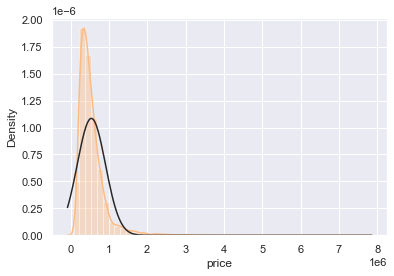

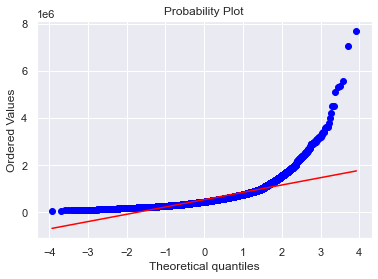

In [22]:
# Examine target ('price') distribution
sns.distplot(y_train, fit=stats.norm)
fig = plt.figure()
stats.probplot(y_train, plot=plt);

In [23]:
# Run log function to normalize target data
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

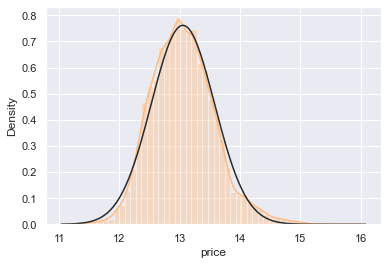

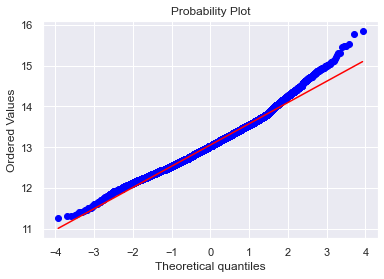

In [24]:
# Re-examine target ('price') 
sns.distplot(y_train_log, fit=stats.norm)
fig = plt.figure()
stats.probplot(y_train_log, plot=plt);

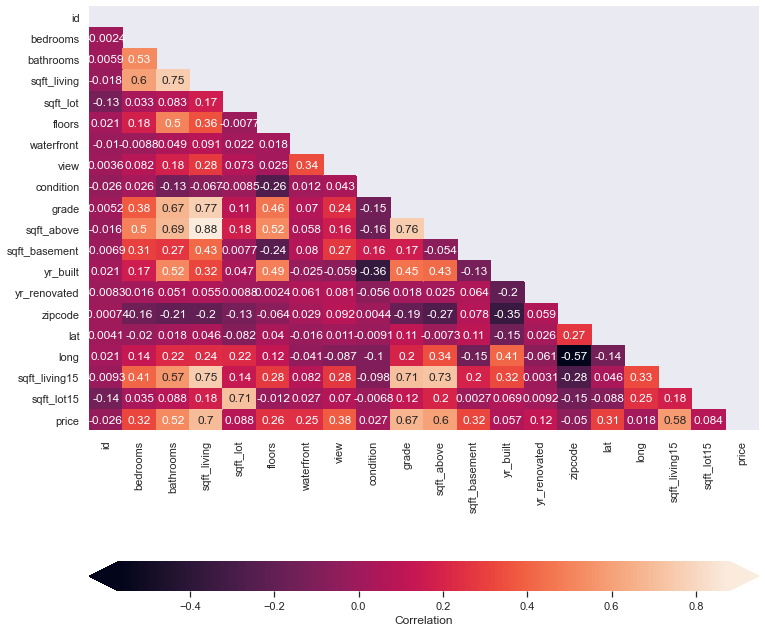

In [25]:
# Show feature correlation of training data
train_data = pd.concat([X_train, y_train], axis=1)
corr = train_data.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)),
            ax=ax,annot=True, cbar_kws={"label": "Correlation",
                                        "orientation": "horizontal",
                                        "pad": .2, "extend": "both"});

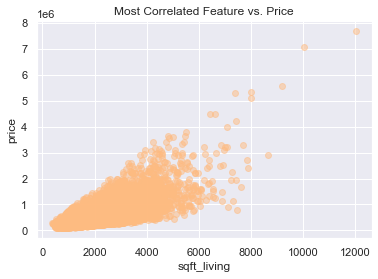

In [26]:
# Show linear correlation with 'price' & 'sqft_living'
most_correlated_feature = 'sqft_living'

fig, ax = plt.subplots()
ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')
ax.set_title('Most Correlated Feature vs. Price');

In [27]:
# Create baseline model with DummyRegressor
baseline = DummyRegressor()
baseline.fit(X_train, y_train_log)
baseline.score(X_test, y_test_log)

-8.383878485695995e-05

In [28]:
# Run baseline model with highested correlated feature ('sqft_living')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit

first_model = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

first_scores = cross_validate(estimator=first_model,
                                 X=X_train[[most_correlated_feature]],
                                 y=y_train_log, return_train_score=True,
                                 cv=splitter)

print('Train score: ', first_scores['train_score'].mean())
print('Validation score: ', first_scores['test_score'].mean())

Train score:  0.4856651402023873
Validation score:  0.47108228336404373


In [29]:
# Add additional, correlated features to X_train data
select_features = X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                             'floors', 'waterfront', 'view', 'condition', 'grade',
                             'sqft_above', 'sqft_basement', 'sqft_living15',
                             'sqft_lot15']].copy()

In [30]:
# Run 2nd model with additional, correlated features
second_model_with_ylog = LinearRegression()

second_model_scores = cross_validate(estimator=second_model_with_ylog,
                                     X=select_features, y=y_train_log,
                                     return_train_score=True, cv=splitter)

print('Second Model')
print('Train score: ', second_model_scores['train_score'].mean())
print('Validation score: ', second_model_scores['test_score'].mean())
print()
print('First Model')
print('Train score: ', first_scores['train_score'].mean())
print('Validation score: ', first_scores['test_score'].mean())

Second Model
Train score:  0.6060248911724325
Validation score:  0.5928302214934841

First Model
Train score:  0.4856651402023873
Validation score:  0.47108228336404373


In [31]:
# Examine OLS summary table to examine coefficients
sm.OLS(y_train_log, sm.add_constant(select_features)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     1874.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:16:54   Log-Likelihood:                -4982.8
No. Observations:               16056   AIC:                             9994.
Df Residuals:                   16042   BIC:                         1.010e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.8257      0.029    369.997      0.000      10.768      10.883
bedrooms         -0.0215      0.004     -5.657      0.000      -0.029      -0.014
bathrooms        -0.0176      0.006     -3.019      0.003      -0.029      -0.006
sqft_living       0.0002    3.4e-05      6.180      0.000       0.000       0.000
sqft_lot       2.574e-07   8.73e-08      2.949      0.003    8.63e-08    4.29e-07
floors            0.0709      0.007     10.736      0.000       0.058       0.084
waterfront        0.3615      0.034     10.498      0.000       0.294       0.429
view              0.0502      0.003     17.775      0.000       0.045       0.056
condition         0.0941      0.004     22.290      0.000       0.086       0.102
grade             0.1815      0.004     45.997      0.000       0.174       0.189
sqft_above    -7.319e-05    3.4e-05     -2.156      0.031      -0.000   -6.64e-06
sqft_basement  5.219e-05   3.37e-05      1.548      0.122   -1.39e-05       0.000
sqft_living15  9.357e-05   6.31e-06     14.821      0.000    8.12e-05       0.000
sqft_lot15    -7.809e-07   1.39e-07     -5.603      0.000   -1.05e-06   -5.08e-07
==============================================================================
Omnibus:                       10.034   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.710
Skew:                           0.042   Prob(JB):                      0.00779
Kurtosis:                       2.914   Cond. No.                     6.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Remove 'sqft_basement' due to high p-value and possible multicollinearity
less_features = select_features.drop(['sqft_basement'], axis=1).copy()

In [33]:
#Run 3rd model with 'sqft_basement' removed
third_model_with_ylog = LinearRegression()

third_model_scores = cross_validate(estimator=third_model_with_ylog,
                                     X=less_features, y=y_train_log,
                                     return_train_score=True, cv=splitter)

print('Third Model')
print('Train score: ', third_model_scores['train_score'].mean())
print('Validation score: ', third_model_scores['test_score'].mean())
print()
print('Second Model')
print('Train score: ', second_model_scores['train_score'].mean())
print('Validation score: ', second_model_scores['test_score'].mean())
print()
print('First Model')
print('Train score: ', first_scores['train_score'].mean())
print('Validation score: ', first_scores['test_score'].mean())

Third Model
Train score:  0.6060012960573499
Validation score:  0.5928295181535921

Second Model
Train score:  0.6060248911724325
Validation score:  0.5928302214934841

First Model
Train score:  0.4856651402023873
Validation score:  0.47108228336404373


In [34]:
# Use recursive feature elimination and feature selection to examine significant features
X_train_for_RFECV = StandardScaler().fit_transform(less_features)

model_for_RFECV = LinearRegression()

selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train_log)

print("Was the column selected?")
for index, col in enumerate(less_features.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
floors: True
waterfront: True
view: True
condition: True
grade: True
sqft_above: True
sqft_living15: True
sqft_lot15: True


Creating a final model with the settled-on, selected features. This is also where we'll normalize (log) and scale the remaining data (independent variables).

In [35]:
final_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                  'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                  'sqft_living15', 'sqft_lot15']

In [36]:
# Build final model and score it

X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

final_model = LinearRegression()
final_model.fit(X_train_final, y_train_log)

final_model.score(X_test_final, y_test_log)

0.5973223847669589

In [37]:
# Check RMSE
mean_squared_error(y_test_log, final_model.predict(X_test_final), squared=False)

0.3323101201702024

Now we need to log and scale independent variables (X_train, X_test) and scale target variable (y_train_log, y_test_log). Note, target already had log applied.

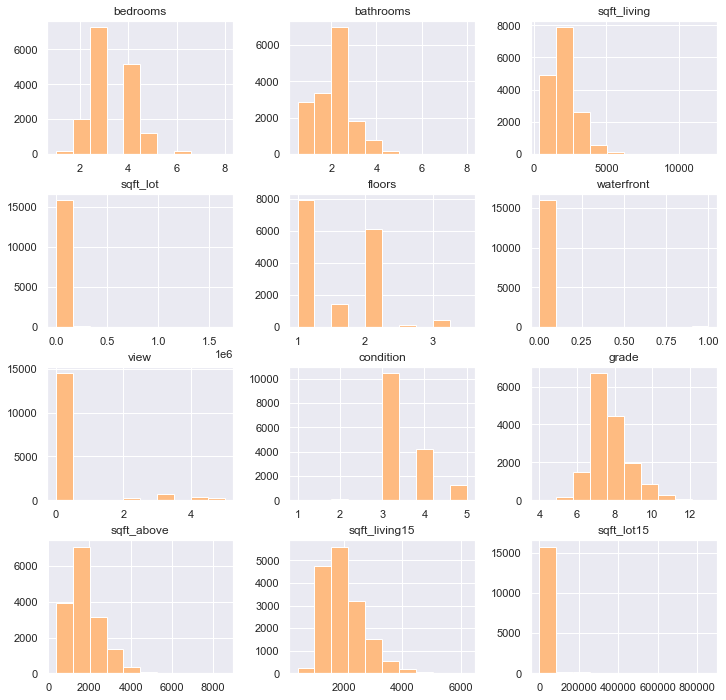

In [38]:
# Examine skew of final features
X_train[final_features].hist(figsize=(12,12));

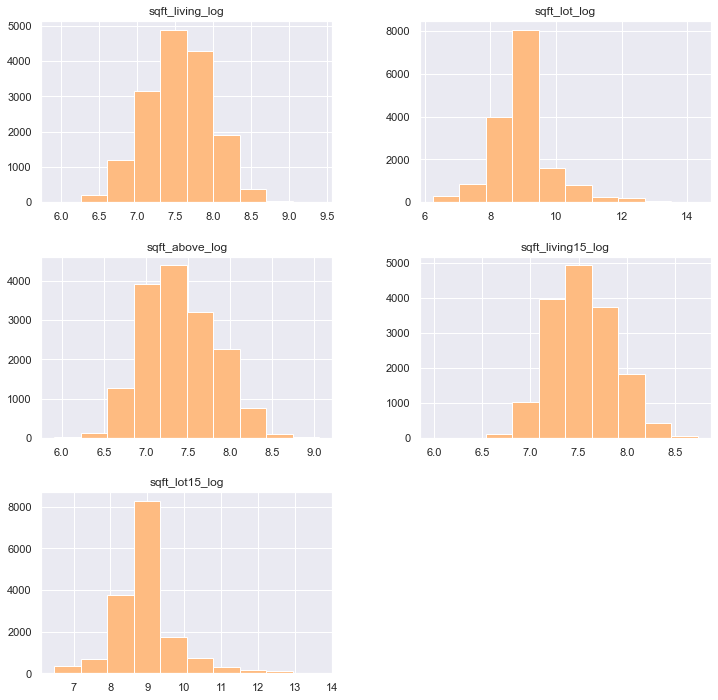

In [39]:
# Apply log to continuous features and re-examine skew
X_train_continuous_log = pd.DataFrame([])
X_train_continuous_log['sqft_living_log'] = np.log(X_train['sqft_living'])
X_train_continuous_log['sqft_lot_log'] = np.log(X_train['sqft_lot'])
X_train_continuous_log['sqft_above_log'] = np.log(X_train['sqft_above'])
X_train_continuous_log['sqft_living15_log'] = np.log(X_train['sqft_living15'])
X_train_continuous_log['sqft_lot15_log'] = np.log(X_train['sqft_lot15'])
X_train_continuous_log.hist(figsize=(12,12));

In [40]:
# Create a DataFrame of all train features (independent & target) so
# everything can be scaled
X_train_discreet = X_train[['bedrooms', 'bathrooms', 'floors', 'waterfront',
                           'view', 'condition', 'grade']]

X_train_cont_disc = pd.concat([X_train_continuous_log, X_train_discreet, y_train_log],
                              axis=1)

train_columns = X_train_cont_disc.columns


In [41]:
# Scale all training features
scaler = StandardScaler()
X_train_log_scaled = scaler.fit_transform(X_train_cont_disc)

In [42]:
# Re-separate target and independent features
X_train_full = pd.DataFrame(X_train_log_scaled, columns=train_columns)

y_train_log_scaled = X_train_full['price']
X_train_log_scaled = X_train_full.drop(columns=['price'])
X_train_log_scaled

,sqft_living_log,sqft_lot_log,sqft_above_log,sqft_living15_log,sqft_lot15_log,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,0.341342,1.621903,0.701227,0.938974,1.875538,-0.416252,0.501470,0.934720,-0.081134,-0.318588,-0.630559,1.135535
1,-1.273579,-0.131180,-0.903065,-0.676565,-0.114957,-0.416252,-1.459386,-0.916846,-0.081134,-0.318588,-0.630559,-0.563878
2,-0.381093,-0.480629,-0.016454,-0.696899,-0.499308,0.699871,-0.152149,0.008937,-0.081134,-0.318588,0.910658,-0.563878
3,-0.776776,0.232819,-0.409532,-0.717370,0.254952,-0.416252,-0.478958,-0.916846,-0.081134,-0.318588,0.910658,-0.563878
4,1.457558,0.556610,1.810095,1.752909,0.652304,1.815995,2.135517,0.934720,-0.081134,-0.318588,-0.630559,1.985242
...,...,...,...,...,...,...,...,...,...,...,...,...
16051,0.197557,-0.078363,0.558388,0.779482,-0.430305,0.699871,0.501470,0.934720,-0.081134,-0.318588,-0.630559,0.285829
16052,-0.267305,0.127210,0.096586,0.074471,0.002344,0.699871,-0.478958,-0.916846,-0.081134,-0.318588,-0.630559,-0.563878
16053,1.710955,0.510454,1.038236,1.982320,0.876369,1.815995,1.481898,0.934720,-0.081134,2.529545,0.910658,1.985242
16054,-0.864543,-1.057355,-0.496722,-1.206285,-0.785712,-1.532376,-1.459386,-0.916846,-0.081134,-0.318588,0.910658,-0.563878


In [43]:
# Repeat the above process for the testing data
X_test_continuous_log = pd.DataFrame([])
X_test_continuous_log['sqft_living_log'] = np.log(X_test['sqft_living'])
X_test_continuous_log['sqft_lot_log'] = np.log(X_test['sqft_lot'])
X_test_continuous_log['sqft_above_log'] = np.log(X_test['sqft_above'])
X_test_continuous_log['sqft_living15_log'] = np.log(X_test['sqft_living15'])
X_test_continuous_log['sqft_lot15_log'] = np.log(X_test['sqft_lot15'])

X_test_discreet = X_test[['bedrooms', 'bathrooms', 'floors', 'waterfront',
                          'view', 'condition', 'grade']]
X_test_cont_disc = pd.concat([X_test_continuous_log, X_test_discreet, y_test_log],
                              axis=1)
test_columns = X_test_cont_disc.columns

scaler2 = StandardScaler()
X_test_log_scaled = scaler2.fit_transform(X_test_cont_disc)

X_test_full = pd.DataFrame(X_test_log_scaled, columns=test_columns)

y_test_log_scaled = X_test_full['price']
X_test_log_scaled = X_test_full.drop(columns=['price'])

In [44]:
# Create, run and score final model using log and scaled data
final_model_log_scaled = LinearRegression()
final_model_log_scaled.fit(X_train_log_scaled, y_train_log_scaled)

final_model_log_scaled.score(X_test_log_scaled, y_test_log_scaled)

0.6016290701772524

In [45]:
# Find scaled RMSE
RMSE_log_scaled = mean_squared_error(y_test_log_scaled,
                   final_model_log_scaled.predict(X_test_log_scaled),
                   squared=False)
np.exp(RMSE_log_scaled)

1.8798017610028435

### Checking Linear Assumptions (though not as important for predictive purposes)
Linearity

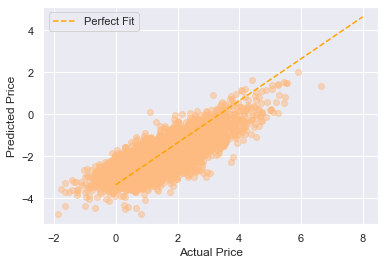

In [46]:
preds = final_model_log_scaled.predict(X_test_log_scaled)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test_log_scaled.min(), y_test_log_scaled.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test_log_scaled+1.5, preds-2, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### Normality

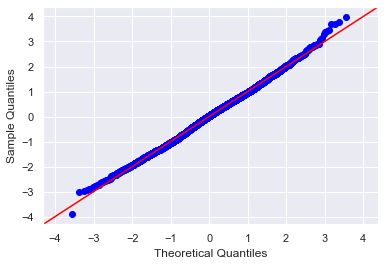

In [47]:
residuals = (y_test_log_scaled - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### Multicollinearity (Independence Assumption)

In [48]:
vif = [variance_inflation_factor(X_train_log_scaled.values, i) for i in range(X_train_log_scaled.shape[1])]
pd.Series(vif, index=X_train_log_scaled.columns, name="Variance Inflation Factor")

sqft_living_log      7.590694
sqft_lot_log         6.879479
sqft_above_log       6.508132
sqft_living15_log    2.693927
sqft_lot15_log       6.628946
bedrooms             1.840879
bathrooms            2.936694
floors               2.317990
waterfront           1.138355
view                 1.264823
condition            1.106391
grade                2.986685
Name: Variance Inflation Factor, dtype: float64

### Homoscedasticity

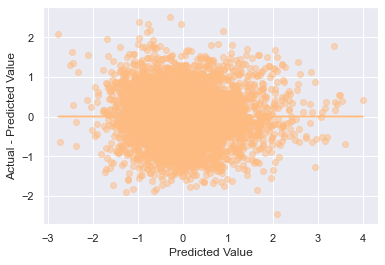

In [49]:
fig, ax = plt.subplots()
ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test_log_scaled))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

# Inferential Modeling

In [50]:
# New Approach: Eliminate Outliers for price.

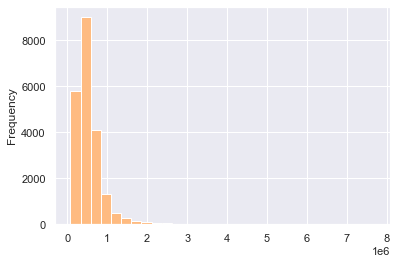

In [51]:
# check distribution of price
df['price'].plot.hist(bins=30);

The distribution of price is heavily skewed right. We will eliminate these outliers.

In [52]:
# Create new dataframe with relevant columns
to_drop = ['id','date','lat','long','zipcode','yr_built','yr_renovated']
new_df = df.drop(to_drop,axis=1)

In [53]:
# Elimate outliers of price that are not within 2 standard deviations of price mean
price_std = new_df.price.std()
price = new_df.price

new_df = new_df[(price <= (price.mean()+2*price_std)) & (price >= (price.mean()-2*price_std))]
print(new_df.shape)

(20575, 14)


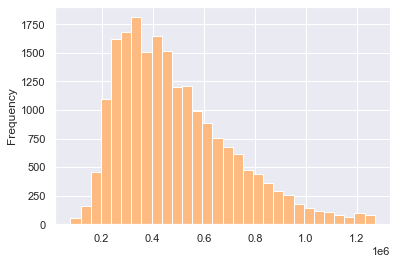

In [54]:
new_y = new_df.price
new_X = new_df.drop('price',axis=1)
new_y.plot.hist(bins=30);

Price is still skewed but more normal than before. We do not want to lose too much data or that will affect our results negatively.

### Initial modeling

In [55]:
new_X = sm.add_constant(new_X)
inf_model = sm.OLS(new_y, new_X)
inf_model = inf_model.fit()
inf_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1809.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:16:57   Log-Likelihood:            -2.7483e+05
No. Observations:               20575   AIC:                         5.497e+05
Df Residuals:                   20561   BIC:                         5.498e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.015e+05   1.22e+04    -40.946      0.000   -5.26e+05   -4.78e+05
bedrooms      -1.241e+04   1590.592     -7.802      0.000   -1.55e+04   -9291.725
bathrooms     -2.152e+04   2437.121     -8.831      0.000   -2.63e+04   -1.67e+04
sqft_living     104.0365     15.129      6.877      0.000      74.383     133.690
sqft_lot          0.1434      0.038      3.783      0.000       0.069       0.218
floors         3.264e+04   2765.760     11.803      0.000    2.72e+04    3.81e+04
waterfront     1.528e+05   2.02e+04      7.552      0.000    1.13e+05    1.92e+05
view           2.635e+04   1250.465     21.076      0.000    2.39e+04    2.88e+04
condition      4.414e+04   1739.525     25.377      0.000    4.07e+04    4.76e+04
grade          8.131e+04   1658.069     49.039      0.000    7.81e+04    8.46e+04
sqft_above      -28.3119     15.075     -1.878      0.060     -57.860       1.236
sqft_basement    26.3203     14.988      1.756      0.079      -3.057      55.697
sqft_living15    47.4517      2.781     17.062      0.000      42.000      52.903
sqft_lot15       -0.4272      0.058     -7.409      0.000      -0.540      -0.314
==============================================================================
Omnibus:                     1454.096   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2055.435
Skew:                           0.603   Prob(JB):                         0.00
Kurtosis:                       3.970   Cond. No.                     9.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking Assumptions

### Linearity

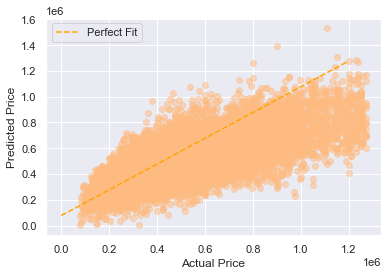

In [56]:
predictions = inf_model.predict(new_X)
fig, ax = plt.subplots()

perfect_line = np.arange(new_y.min(), new_y.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(new_y, predictions, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### Normality

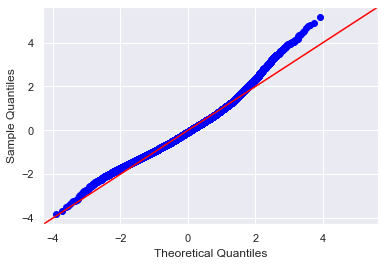

In [57]:
fig = sm.graphics.qqplot(inf_model.resid, dist=stats.norm, line='45', fit=True)

### Multicollinearity

In [58]:
vif = [variance_inflation_factor(new_X.values[1:], i) for i in range(new_X.shape[1])]
list(zip(new_X.columns[1:], vif))

[('bedrooms', 131.66975870626354),
 ('bathrooms', 1.7159409507713435),
 ('sqft_living', 2.6774498231368624),
 ('sqft_lot', 128.09715739887716),
 ('floors', 2.0354891997049807),
 ('waterfront', 1.938848363478521),
 ('view', 1.0793547464593385),
 ('condition', 1.1830934937752442),
 ('grade', 1.1116549731898535),
 ('sqft_above', 2.725505207662581),
 ('sqft_basement', 110.72890232084822),
 ('sqft_living15', 33.529807644241245),
 ('sqft_lot15', 2.71890705107723)]

### Homoskedasticity

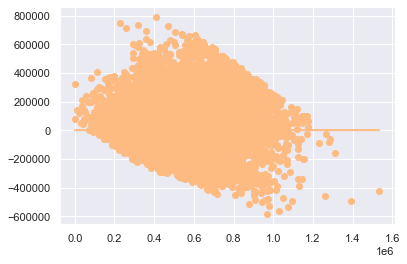

In [59]:
plt.scatter(inf_model.predict(new_X), inf_model.resid)
plt.plot(inf_model.predict(new_X), [0 for i in range(len(new_X))]);

### Refinements to the model
We will drop the independent variables with high p-values since they are not significant.
We will once again check the assumptions for this refined model.

In [60]:
new_X_1 = new_X.drop(['sqft_basement','sqft_above'], axis=1)
inf_model = sm.OLS(new_y, new_X_1)
inf_model = inf_model.fit()
inf_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     2090.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:16:59   Log-Likelihood:            -2.7495e+05
No. Observations:               20575   AIC:                         5.499e+05
Df Residuals:                   20563   BIC:                         5.500e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.766e+05   1.22e+04    -39.007      0.000   -5.01e+05   -4.53e+05
bedrooms      -1.261e+04   1599.878     -7.882      0.000   -1.57e+04   -9474.623
bathrooms     -1.548e+04   2420.701     -6.393      0.000   -2.02e+04   -1.07e+04
sqft_living      95.6738      2.835     33.752      0.000      90.118     101.230
sqft_lot          0.1146      0.038      3.009      0.003       0.040       0.189
floors         1.289e+04   2478.061      5.201      0.000    8030.282    1.77e+04
waterfront      1.46e+05   2.03e+04      7.175      0.000    1.06e+05    1.86e+05
view           2.987e+04   1237.578     24.133      0.000    2.74e+04    3.23e+04
condition      4.637e+04   1743.687     26.592      0.000     4.3e+04    4.98e+04
grade          7.859e+04   1658.969     47.372      0.000    7.53e+04    8.18e+04
sqft_living15    37.3281      2.721     13.718      0.000      31.995      42.662
sqft_lot15       -0.4612      0.058     -7.955      0.000      -0.575      -0.348
==============================================================================
Omnibus:                     1443.443   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2001.441
Skew:                           0.608   Prob(JB):                         0.00
Kurtosis:                       3.925   Cond. No.                     9.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

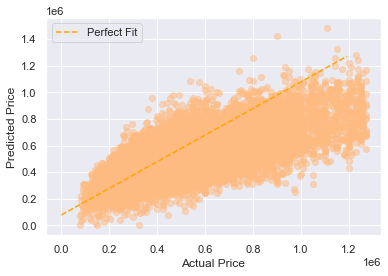

In [61]:
#Linearity of second model
predictions = inf_model.predict(new_X_1)
fig, ax = plt.subplots()

perfect_line = np.arange(new_y.min(), new_y.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(new_y, predictions, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

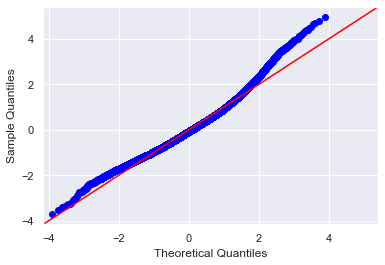

In [62]:
# Normality for second model
fig = sm.graphics.qqplot(inf_model.resid, dist=stats.norm, line='45', fit=True)

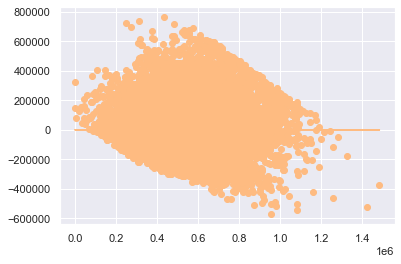

In [63]:
# Homoskedasticity for second model
plt.scatter(inf_model.predict(new_X_1), inf_model.resid)
plt.plot(inf_model.predict(new_X_1), [0 for i in range(len(new_X_1))]);

In [64]:
# Multicollinearity for second model
vif = [variance_inflation_factor(new_X_1.values[1:], i) for i in range(new_X_1.shape[1])]
list(zip(new_X_1.columns[1:], vif))

[('bedrooms', 129.4935743584083),
 ('bathrooms', 1.7153846714124759),
 ('sqft_living', 2.6100941762003957),
 ('sqft_lot', 4.443532625338467),
 ('floors', 2.0304627850079178),
 ('waterfront', 1.5379339188211125),
 ('view', 1.0787751008501736),
 ('condition', 1.1450482521434087),
 ('grade', 1.103697398779606),
 ('sqft_living15', 2.696015700884297),
 ('sqft_lot15', 2.571726201548529)]

We can see that the VIF for bedrooms is high which indicates there is multicollinearity issues cause by **bedrooms**.

### More Refinements

In [65]:
# Third model
# Removing bedrooms
new_X_2 = new_X_1.drop('bedrooms',axis=1)
inf_model = sm.OLS(new_y, new_X_2)
inf_model = inf_model.fit()
inf_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     2286.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:17:00   Log-Likelihood:            -2.7499e+05
No. Observations:               20575   AIC:                         5.500e+05
Df Residuals:                   20564   BIC:                         5.501e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -5.09e+05   1.15e+04    -44.160      0.000   -5.32e+05   -4.86e+05
bathrooms     -1.904e+04   2381.556     -7.996      0.000   -2.37e+04   -1.44e+04
sqft_living      86.6461      2.597     33.366      0.000      81.556      91.736
sqft_lot          0.1217      0.038      3.192      0.001       0.047       0.196
floors         1.428e+04   2475.434      5.768      0.000    9427.126    1.91e+04
waterfront     1.494e+05   2.04e+04      7.333      0.000    1.09e+05    1.89e+05
view           3.055e+04   1236.406     24.706      0.000    2.81e+04     3.3e+04
condition      4.552e+04   1742.932     26.116      0.000    4.21e+04    4.89e+04
grade          8.052e+04   1643.213     49.001      0.000    7.73e+04    8.37e+04
sqft_living15    38.0151      2.724     13.957      0.000      32.676      43.354
sqft_lot15       -0.4380      0.058     -7.554      0.000      -0.552      -0.324
==============================================================================
Omnibus:                     1397.993   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1910.686
Skew:                           0.600   Prob(JB):                         0.00
Kurtosis:                       3.889   Cond. No.                     9.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

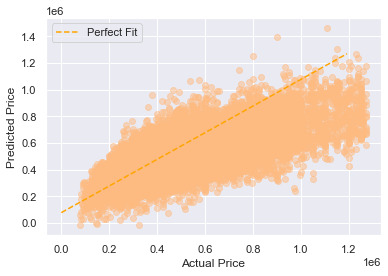

In [66]:
# Linearity for third model
predictions = inf_model.predict(new_X_2)
fig, ax = plt.subplots()

perfect_line = np.arange(new_y.min(), new_y.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(new_y, predictions, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

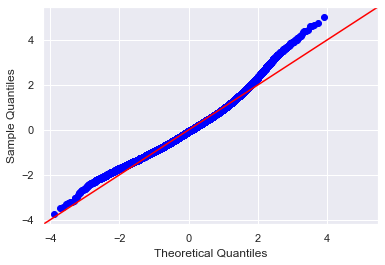

In [67]:
# Normality for third model
fig = sm.graphics.qqplot(inf_model.resid, dist=stats.norm, line='45', fit=True)

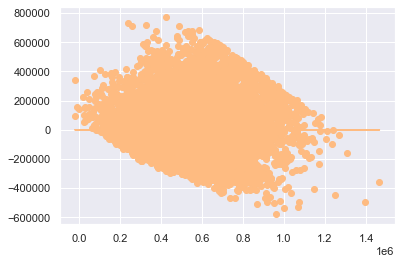

In [68]:
# Homoskedasticity for third model
plt.scatter(inf_model.predict(new_X_2), inf_model.resid)
plt.plot(inf_model.predict(new_X_2), [0 for i in range(len(new_X_2))]);

In [69]:
# Multicollinearity for third model
vif = [variance_inflation_factor(new_X_2.values[1:], i) for i in range(new_X_2.shape[1])]
list(zip(new_X_2.columns[1:], vif))

[('bathrooms', 114.87765379945608),
 ('sqft_living', 2.5188502502009666),
 ('sqft_lot', 3.71811187721001),
 ('floors', 2.029324803789846),
 ('waterfront', 1.5301297130224711),
 ('view', 1.0782897070913604),
 ('condition', 1.139493111929328),
 ('grade', 1.099470454469457),
 ('sqft_living15', 2.637195805955001),
 ('sqft_lot15', 2.5690899656647344)]

We will continue one last time removing bathrooms. We will also remove sqft_living15 and sqft_lot15 as they will be correlated to sqft_living and sqft_lot respectively.

In [70]:
# Last model
# Removing sqft_living15, sqft_lot15, and bathrooms
new_X_3 = new_X_2.drop(['sqft_living15','sqft_lot15','bathrooms'],axis=1)
inf_model = sm.OLS(new_y, new_X_3)
inf_model = inf_model.fit()
inf_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     3175.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:17:02   Log-Likelihood:            -2.7514e+05
No. Observations:               20575   AIC:                         5.503e+05
Df Residuals:                   20567   BIC:                         5.504e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -5.15e+05   1.16e+04    -44.371      0.000   -5.38e+05   -4.92e+05
sqft_living    91.4539      1.988     46.000      0.000      87.557      95.351
sqft_lot       -0.0577      0.027     -2.103      0.035      -0.111      -0.004
floors       5485.8081   2344.030      2.340      0.019     891.324    1.01e+04
waterfront   1.453e+05   2.05e+04      7.083      0.000    1.05e+05    1.86e+05
view         3.223e+04   1240.300     25.986      0.000    2.98e+04    3.47e+04
condition    4.409e+04   1751.762     25.166      0.000    4.07e+04    4.75e+04
grade        8.652e+04   1558.733     55.506      0.000    8.35e+04    8.96e+04
==============================================================================
Omnibus:                     1466.219   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2028.250
Skew:                           0.616   Prob(JB):                         0.00
Kurtosis:                       3.920   Cond. No.                     8.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

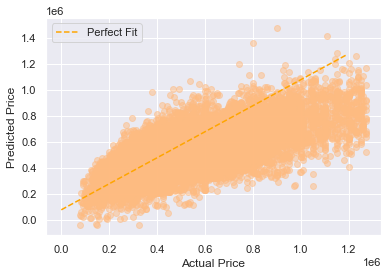

In [71]:
# Linearity for last model
predictions = inf_model.predict(new_X_3)
fig, ax = plt.subplots()

perfect_line = np.arange(new_y.min(), new_y.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(new_y, predictions, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

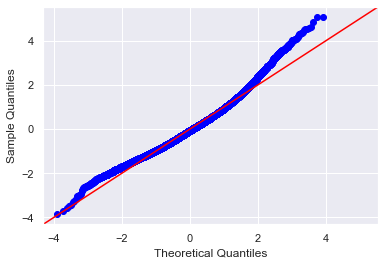

In [72]:
# Normality for last model
fig = sm.graphics.qqplot(inf_model.resid, dist=stats.norm, line='45', fit=True)

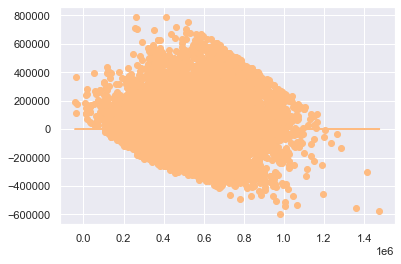

In [73]:
# Homoskedasticity for last model
plt.scatter(inf_model.predict(new_X_3), inf_model.resid)
plt.plot(inf_model.predict(new_X_3), [0 for i in range(len(new_X_3))]);

In [74]:
# Multicollinearity for last model
vif = [variance_inflation_factor(new_X_3.values[1:], i) for i in range(new_X_3.shape[1])]
list(zip(new_X_3.columns[1:], vif))

[('sqft_living', 114.77325789274046),
 ('sqft_lot', 2.147584753801609),
 ('floors', 1.0351684301563053),
 ('waterfront', 1.3519608065454718),
 ('view', 1.077845584867815),
 ('condition', 1.129913242340356),
 ('grade', 1.094392222757531)]

In [75]:
rmse = mean_squared_error(predictions,new_y)**.5
score = inf_model.rsquared
print(f'rmse: {rmse}')
print()
print(f'r-squared: {score}')

rmse: 155364.4296572794

r-squared: 0.5193902726373054


In [76]:
# Should we drop sqft_living? It is the most correlated with price.
# I've tried it, doing so will drop rsquared by a lot.

In [77]:
new_X_3.corr().drop('const',axis=1).drop('const',axis=0)

,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
sqft_living,1.000000,0.162475,0.342522,0.001662,0.186985,-0.075804,0.718781
sqft_lot,0.162475,1.000000,-0.016077,0.024223,0.071752,-0.004143,0.096756
floors,0.342522,-0.016077,1.000000,-0.004773,-0.011769,-0.277367,0.457062
waterfront,0.001662,0.024223,-0.004773,1.000000,0.262100,0.011928,-0.008396
view,0.186985,0.071752,-0.011769,0.262100,1.000000,0.036421,0.151521
condition,-0.075804,-0.004143,-0.277367,0.011928,0.036421,1.000000,-0.171539
grade,0.718781,0.096756,0.457062,-0.008396,0.151521,-0.171539,1.000000


In [78]:
# sqft_living and grade are highly correlated so let's try dropping grade
new_X_4 = new_X_3.drop('grade',axis=1)
inf_model = sm.OLS(new_y, new_X_4)
inf_model = inf_model.fit()
inf_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     2775.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:17:03   Log-Likelihood:            -2.7657e+05
No. Observations:               20575   AIC:                         5.532e+05
Df Residuals:                   20568   BIC:                         5.532e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.272e+04   8251.307     -3.966      0.000   -4.89e+04   -1.66e+04
sqft_living   163.9739      1.607    102.048      0.000     160.824     167.123
sqft_lot       -0.0690      0.029     -2.345      0.019      -0.127      -0.011
floors       4.385e+04   2401.659     18.258      0.000    3.91e+04    4.86e+04
waterfront   1.134e+05    2.2e+04      5.156      0.000    7.03e+04    1.57e+05
view         3.659e+04   1327.253     27.570      0.000     3.4e+04    3.92e+04
condition    3.513e+04   1870.362     18.783      0.000    3.15e+04    3.88e+04
==============================================================================
Omnibus:                     1291.498   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1646.533
Skew:                           0.597   Prob(JB):                         0.00
Kurtosis:                       3.702   Cond. No.                     8.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
# Rsquared dropped by a lot

In [80]:
new_X_4.corr().drop('const',axis=1).drop('const',axis=0)

,sqft_living,sqft_lot,floors,waterfront,view,condition
sqft_living,1.000000,0.162475,0.342522,0.001662,0.186985,-0.075804
sqft_lot,0.162475,1.000000,-0.016077,0.024223,0.071752,-0.004143
floors,0.342522,-0.016077,1.000000,-0.004773,-0.011769,-0.277367
waterfront,0.001662,0.024223,-0.004773,1.000000,0.262100,0.011928
view,0.186985,0.071752,-0.011769,0.262100,1.000000,0.036421
condition,-0.075804,-0.004143,-0.277367,0.011928,0.036421,1.000000


In [81]:
# No more significantly high correlations